In [1]:
#pip install psycopg2

In [2]:
import psycopg2
import config_lake as creds
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [4]:
connect()

Connected!


(<connection object at 0x000002A6912A48C0; dsn: 'user=TeamX password=xxx dbname=postgres host=lakerds.czuthh2ifupq.us-east-1.rds.amazonaws.com port=5432', closed: 0>,
 <cursor object at 0x000002A69129E9E0; closed: 0>)

In [5]:
# Select data 
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
conn = psycopg2.connect(conn_string)
cur = conn.cursor()

In [6]:
postgreSQL_select_Query = "select * from ElectricityProductionPlants"

cur.execute(postgreSQL_select_Query)
print("Selecting rows from table using cursor.fetchall")
df_records = cur.fetchall()

Selecting rows from table using cursor.fetchall


In [7]:
df = pd.DataFrame(df_records, columns = ['xtf_id','PostCode','Municipality', 'Canton', 'BeginningOfOperation',
                                         'MainCategory', 'SubCategory', 'InitialPower','TotalPower'])
df.head()

,xtf_id,PostCode,Municipality,Canton,BeginningOfOperation,MainCategory,SubCategory,InitialPower,TotalPower
0,14727,4147,Aesch BL,BL,2009,Other renewable energies,Photovoltaic,14.65,18.81
1,14728,5082,Kaisten,AG,2011,Other renewable energies,Photovoltaic,5.80,5.80
2,10164,3114,Wichtrach,BE,2008,Other renewable energies,Photovoltaic,3.00,3.00
3,10794,3753,Oey,BE,2008,Other renewable energies,Photovoltaic,8.40,8.40
4,9476,8340,Hinwil,ZH,2006,Other renewable energies,Photovoltaic,4.80,4.80


In [8]:
# Data Quality
df.info()
# Checking uniqueness of ids etc.
print('Unique ids:', df['xtf_id'].nunique(), 'Length df ids:', len(df['xtf_id']))
print('Unique cantons:', df['Canton'].nunique())
print('Unique Post codes:', df['PostCode'].nunique(), '; Swiss total: 4405 (2019)', '; Unique Municipalities:', df['Municipality'].nunique(), '; Discrepancy due to small villages without own post code (e.g 6204)')
print('Unique Main categories:', df['MainCategory'].nunique(), 'Unique Sub categories:', df['SubCategory'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141188 entries, 0 to 141187
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   xtf_id                141188 non-null  int64  
 1   PostCode              141188 non-null  int64  
 2   Municipality          141188 non-null  object 
 3   Canton                141188 non-null  object 
 4   BeginningOfOperation  141188 non-null  int64  
 5   MainCategory          141188 non-null  object 
 6   SubCategory           141188 non-null  object 
 7   InitialPower          141188 non-null  float64
 8   TotalPower            141188 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 9.7+ MB
Unique ids: 141188 Length df ids: 141188
Unique cantons: 26
Unique Post codes: 3230 ; Swiss total: 4405 (2019) ; Unique Municipalities: 6528 ; Discrepancy due to small villages without own post code (e.g 6204)
Unique Main categories: 4 Unique Sub categorie

In [61]:
# Checking year of Beginning of operation
list_years = sorted(list(df['BeginningOfOperation'].drop_duplicates()))
list_years
df_19xx = df.loc[df['BeginningOfOperation'] <= 1920]
df_19xx

,xtf_id,PostCode,Municipality,Canton,BeginningOfOperation,MainCategory,SubCategory,InitialPower,TotalPower
136288,5936,8192,Zweidlen,ZH,1920,Hydroelectric power,Hydroelectric power,45220.0,45220.0
136291,5816,8754,Netstal,GL,1908,Hydroelectric power,Hydroelectric power,60000.0,60000.0
136294,5802,5312,Döttingen,AG,1902,Hydroelectric power,Hydroelectric power,19250.0,19250.0
136295,5751,5313,Klingnau,AG,1902,Hydroelectric power,Hydroelectric power,40950.0,40950.0
136306,5727,7744,Campocologno,GR,1907,Hydroelectric power,Hydroelectric power,55000.0,55000.0
...,...,...,...,...,...,...,...,...,...
140988,10048,8782,Rüti,GL,1918,Hydroelectric power,Hydroelectric power,168.0,168.0
141013,10092,3048,Worblaufen,BE,1900,Hydroelectric power,Hydroelectric power,15.0,15.0
141015,10095,3452,Grünenmatt,BE,1905,Hydroelectric power,Hydroelectric power,4.0,4.0
141016,10097,3557,Fankhaus,BE,1905,Hydroelectric power,Hydroelectric power,3.0,3.0


In [10]:
# Main categories
list_MainCategory = sorted(list(df['MainCategory'].drop_duplicates()))
list_MainCategory

['Fossil fuel',
 'Hydroelectric power',
 'Nuclear energy',
 'Other renewable energies']

In [62]:
# Sub categories
list_SubCategory = sorted(list(df['SubCategory'].drop_duplicates()))
list_SubCategory

['Biomass',
 'Crude oil',
 'Hydroelectric power',
 'Natural gas',
 'Nuclear energy',
 'Photovoltaic',
 'Waste',
 'Wind energy']

In [11]:
# Plotting energy production by year / Total power / MainCategory
# Set up
list_years = sorted(list(df['BeginningOfOperation'].drop_duplicates()))
Hydro = df.loc[df['MainCategory'] == 'Hydroelectric power'].groupby('BeginningOfOperation').agg({'TotalPower': ['sum', 'mean']})
Renewable = df.loc[df['MainCategory'] == 'Other renewable energies'].groupby('BeginningOfOperation').agg({'TotalPower': ['sum', 'mean']})
Fossil = df.loc[df['MainCategory'] == 'Fossil fuel'].groupby('BeginningOfOperation').agg({'TotalPower': ['sum', 'mean']})
Nuclear = df.loc[df['MainCategory'] == 'Nuclear energy'].groupby('BeginningOfOperation').agg({'TotalPower': ['sum', 'mean']})
list(Hydro.columns)

[('TotalPower', 'sum'), ('TotalPower', 'mean')]

<AxesSubplot:xlabel='BeginningOfOperation'>

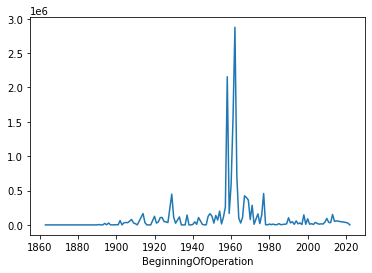

In [42]:
Hydro[('TotalPower', 'sum')].plot()

In [60]:
# Means
Hydro_means = list(Hydro['TotalPower', 'mean'])
Renewable_means = list(Renewable['TotalPower', 'mean'])
Fossil_means = Fossil['TotalPower', 'mean']
Nuclear_means = Nuclear['TotalPower', 'mean']
# Sums
Hydro_sum = list(Hydro['TotalPower', 'sum'])
Renewable_sum = list(Renewable['TotalPower', 'sum'])
Fossil_sum = Fossil['TotalPower', 'sum']
Nuclear_sum = Nuclear['TotalPower', 'sum']